# Autozen Explorarotry Data Analysis  (EDA)

Welcome to the Exploratory Data Analysis (EDA) notebook for the dataset. This notebook aims to provide a comprehensive analysis of the preprocessed dataset we pulled from the databases, uncovering patterns, relationships, and insights that can help us better understand the data. EDA is an essential step in the data analysis process, as it allows us to gain familiarity with the dataset and derive meaningful conclusions.

In this notebook, we will perform a variety of exploratory data analysis techniques to gain insights into the dataset. EDA involves examining the structure and content of the data, identifying missing values, outliers, and anomalies, as well as investigating the relationships between variables. By visualizing the data and conducting statistical analysis, we can uncover patterns, trends, and correlations that can guide us in further analysis or modeling tasks.

The objectives of this EDA notebook include:

1. Data Familiarization: We will start by getting an overview of the dataset, including its size, variables, and their types. Understanding the data's structure is crucial for subsequent analysis.

2. Descriptive Statistics: We will compute various descriptive statistics such as mean, median, standard deviation, and quartiles to summarize the central tendencies and spread of the variables. This will provide us with a better understanding of the dataset's distribution.

3. Data Cleaning: Before diving into the analysis, we will address data cleaning tasks such as handling missing values, removing duplicates, and addressing outliers. This step ensures the reliability and accuracy of our analysis.

4. Univariate Analysis: We will explore each variable individually, visualizing their distributions using histograms, box plots, or bar graphs. This analysis will help us identify any patterns, anomalies, or outliers within individual variables.

5. Bivariate and Multivariate Analysis: We will investigate the relationships between variables using scatter plots, correlation matrices, or pair plots. This analysis will enable us to uncover associations, dependencies, or trends between different variables in the dataset.

6. Key Findings and Insights: Based on our analysis, we will summarize the key findings, insights, and patterns discovered during the EDA process. These insights can guide further analysis or decision-making processes.

For this dataset, we have a wide range of variables capturing various aspects of the vehicles, including general information, exterior condition, tire condition, under-vehicle components, interior features, lighting, and test drive observations. Each variable will be explored and analyzed to extract valuable insights. 

## Load Data and Libraries

In [1]:
# all reusable code is located in scripts and no in Jupyter Notebooks
import sys
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'notebook'
plt.style.use('seaborn-whitegrid')

sys.path.append('./scripts')
notebook_dir = os.getcwd()
data_dir = os.path.join(notebook_dir, ".", "data")
img_dir = os.path.join(notebook_dir, ".", "img")

from data_collection import DataCollector
from autozen_features import AutozenFeatures
from model_ml_training import ModelTrainerML
from model_nn_training import ModelTrainerNN
from utils import get_column_info

import warnings
warnings.filterwarnings("ignore")

/var/folders/kh/ts9l8kk51cg14948m227s7f80000gp/T/ipykernel_58542/1125997549.py:16: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [2]:
# Autozen features are defined in AutozenFeatures in the scripts modules
MERGED_PROCESSED_WON = os.path.join(data_dir,"processed_az_auctioned_won.csv")
MERGED_PROCESSED_AUCTIONED = os.path.join(data_dir,"processed_az_auctioned.csv")
df_won = pd.read_csv(MERGED_PROCESSED_WON)
df_auctioned = pd.read_csv(MERGED_PROCESSED_AUCTIONED)
df_won = df_won.drop(AutozenFeatures.to_drop_feat_list,axis=1)
print(f"new shape after dropping columns not required {df_won.shape}")

new shape after dropping columns not required (1323, 213)


## Dealing with Missing Data 
We start with examining the dataset and checking for missing values within different columns. Understanding the extent and patterns of missing values is crucial for ensuring data integrity and making informed decisions about data handling and preprocessing. To begin with, we perform a comprehensive examination of the dataset to identify the presence and distribution of missing values across different variables. Various visualizations are employed to provide a clear understanding of the missing data patterns. These visualizations include:

1. Visual Inspection: 
2. Missing Data Matrix: We construct a matrix that displays the presence or absence of data for each variable in the dataset. Missing values are represented by blank cells or a distinct color, while non-missing values are denoted by filled cells or another color. This matrix provides an overview of the missingness across all variables, enabling us to identify variables with high or low missing data.
3. Missing Data Bar plot: This plot illustrates the percentage of missing values for each variable in the dataset. It provides a concise summary of the missing data distribution, highlighting variables that may require special attention or further investigation.

Therefore, What can we say about the missing data in Autozen training data set ?<br>
The Autozen data has a very high percentage of missing data values that we would need to impute or process in different ways before we input this into the machine learning models.

In [3]:
columns_list = get_column_info(df_won) 
columns_list.sort_values("Null Values", ascending=False).head(10)

(1323, 213)
(213, 4)


Column  Unique Values  Null Values  \
180                   interior_evChargingKit              1         1321   
156           interior_gloveBoxCenterConsole              2         1257   
112             under_the_hood_batteryRating             26         1256   
113  under_the_hood_batteryActualMeasurement             49         1256   
157     interior_steeringWheelSteeringColumn              2         1251   
76              tires_aftermarketWheelsTires              2         1231   
168            interior_acOperationBlowsCold              2         1230   
77                        tires_oemAvailable              2         1229   
138                           interior_seats              2         1157   
85               tires_additionalIssuesTires              3         1149   

        Type  
180   object  
156   object  
112  float64  
113  float64  
157   object  
76    object  
168   object  
77    object  
138   object  
85    object

<Figure size 1600x900 with 0 Axes>

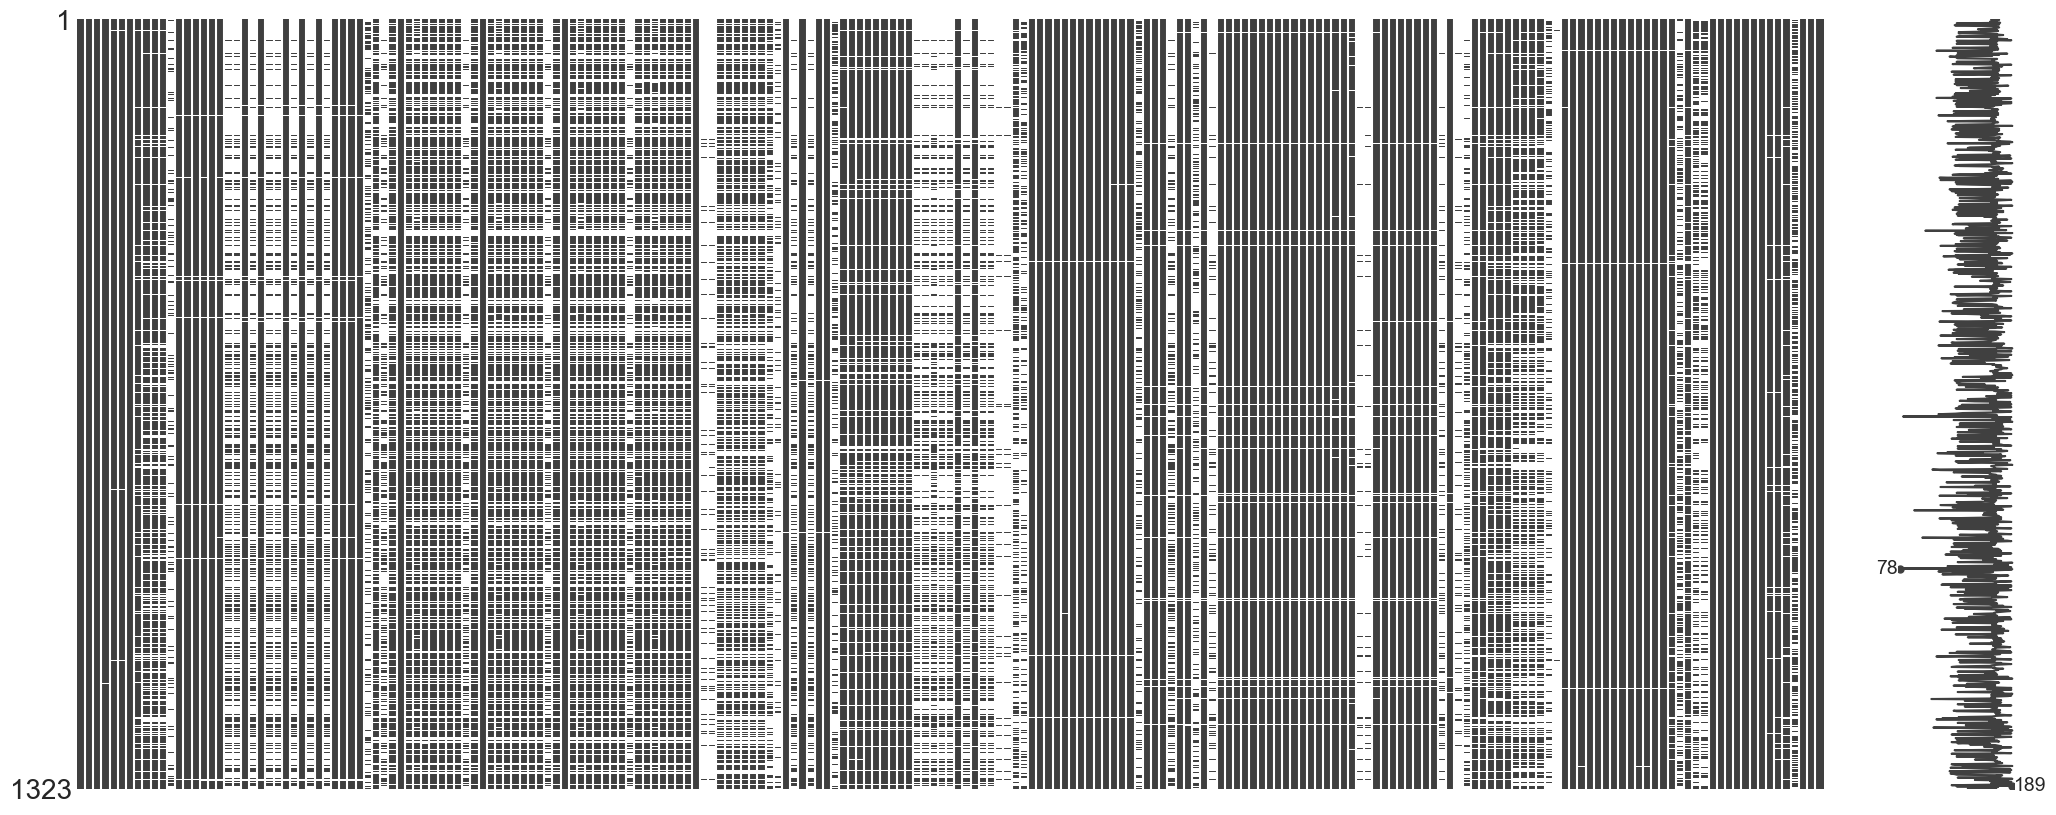

In [4]:
# Visualize missing values as a matrix
plt.figure(figsize=(16, 9))  # Adjust the size as needed
msno.matrix(df_won)
plt.show()

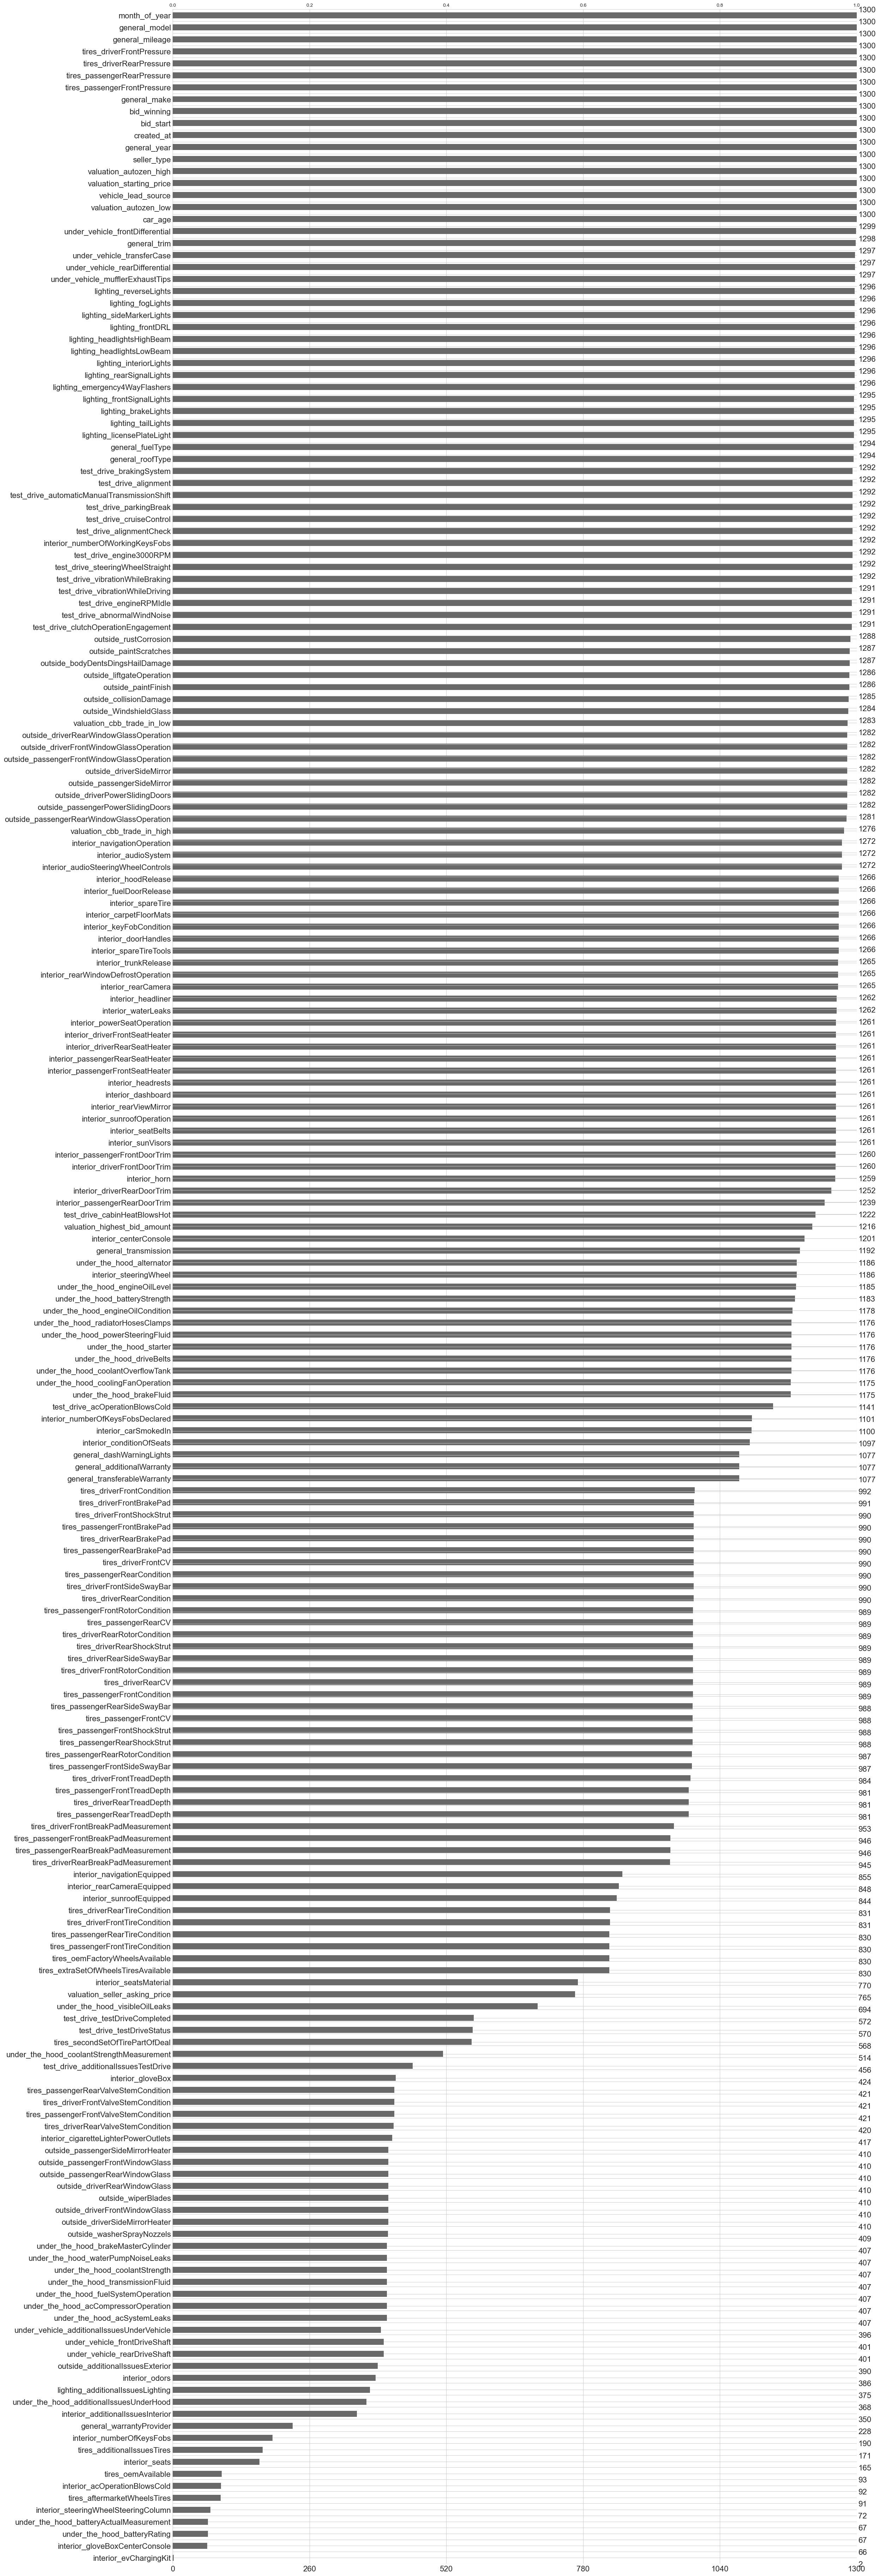

In [5]:
missing_values = df_won.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
sorted_columns = missing_values_sorted.index
df_sorted = df_won[sorted_columns]
msno.bar(df_sorted.sample(1300))
plt.show()

Based on the missing value data matrix and the bar chart we see a great majority of columns with missing data or very few entries as well. To deal with these there are two approaches we might take, one is dropping the columns entirely and the other is using an imputation method like k-nn imputation for instance.

## Visualizing Numerical Variables

1. **Histograms**: provide a visual representation of the distribution of a single variable. By dividing the range of values into intervals or bins and counting the number of observations falling into each bin, histograms help us understand the frequency and density of values within the variable. In our analysis, we created histograms for each numerical variable, allowing us to examine their shape, central tendency, and spread. This visualization enabled us to identify any outliers, assess the presence of skewness, and get an overall understanding of the data distribution.

2. **Pairplots**: on the other hand, offer a comprehensive view of the relationships between multiple numerical variables. By plotting pairwise scatter plots of variables against each other, pairplots allow us to observe the potential correlations, trends, and patterns in the data. This visualization is particularly useful when exploring the interactions between different variables and looking for potential associations. In our analysis, we generated a pairplot for the numerical variables in the dataset, which provided us with a matrix of scatter plots. This allowed us to examine the pairwise relationships and identify any apparent connections or dependencies between the variables.

3. **Box plots**: also known as box-and-whisker plots, provide a visual summary of the distribution of a numerical variable. They display the median, quartiles, and potential outliers, allowing for a quick assessment of the spread, skewness, and presence of extreme values. By drawing a box that represents the interquartile range (IQR) and "whiskers" that extend to the minimum and maximum values within a certain range, box plots provide a concise representation of the data distribution and help identify any deviations from the norm. In our analysis, we constructed box plots for each numerical variable, enabling us to compare their central tendencies, spread, and variability. This visualization allowed us to quickly identify outliers, assess the presence of skewed distributions, and understand the overall range of values for each variable.

4. **Correlation Matrix:** Another important visualization for numerical variables is the correlation matrix. The correlation matrix provides a comprehensive view of the relationships between pairs of variables by displaying the correlation coefficients between them. Correlation coefficients measure the strength and direction of the linear relationship between two variables, ranging from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation.

Together, histograms, boxplots, correlation matrices, and pairplots provide valuable visualizations to understand the distribution, relationship, and behavior of numerical variables in the dataset. These insights can guide further analysis, feature selection, or modeling decisions, helping us gain a deeper understanding of the dataset and its underlying characteristics.

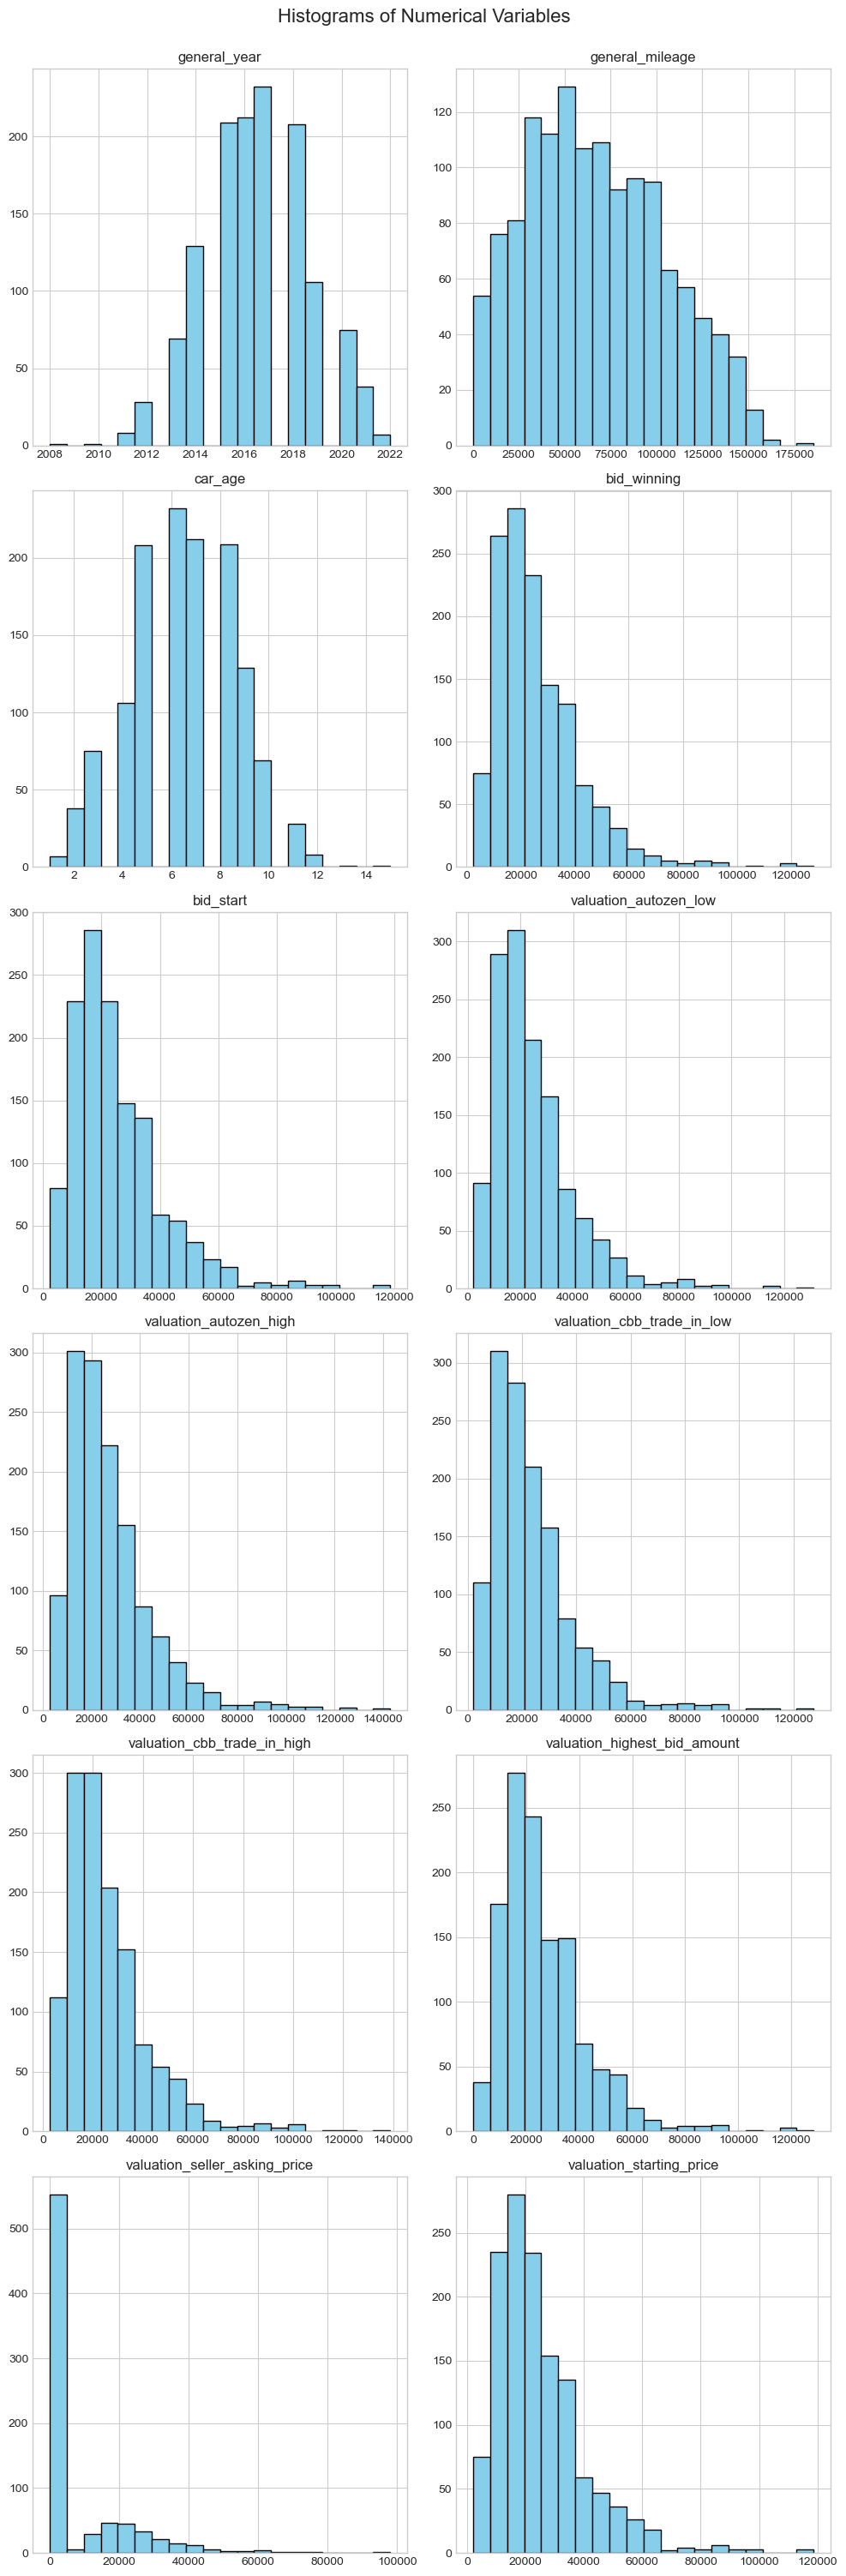

In [6]:
# Create dataframe with numerical variables
num_df = df_won[['general_year', 'general_mileage', 'car_age', 'bid_winning', 'bid_start',
                 'valuation_autozen_low', 'valuation_autozen_high', 'valuation_cbb_trade_in_low',
                 'valuation_cbb_trade_in_high', 'valuation_highest_bid_amount', 'valuation_seller_asking_price',
                 'valuation_starting_price']]

num_rows = 6
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*5))
fig.suptitle('Histograms of Numerical Variables', fontsize=16, y=1.0)
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    ax = axes[i]
    ax.hist(num_df[col].dropna(), color='skyblue', edgecolor='black', bins=20)
    ax.set_title(col)
fig.tight_layout()
plt.show()


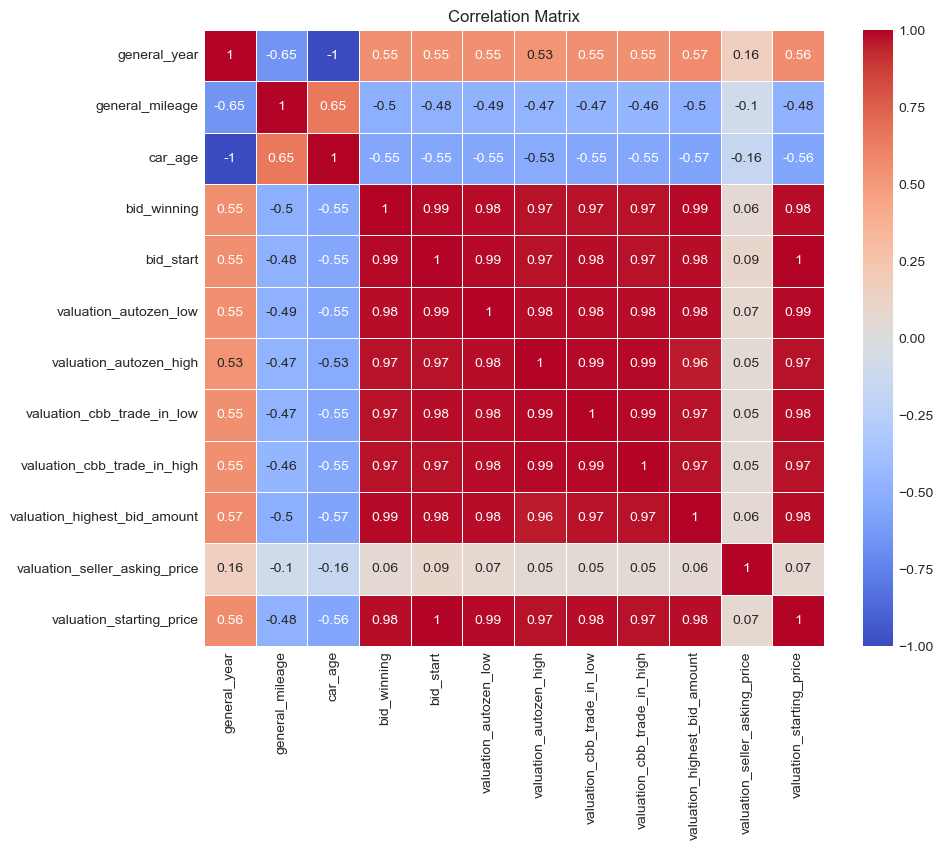

In [7]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.grid(False)
plt.show()

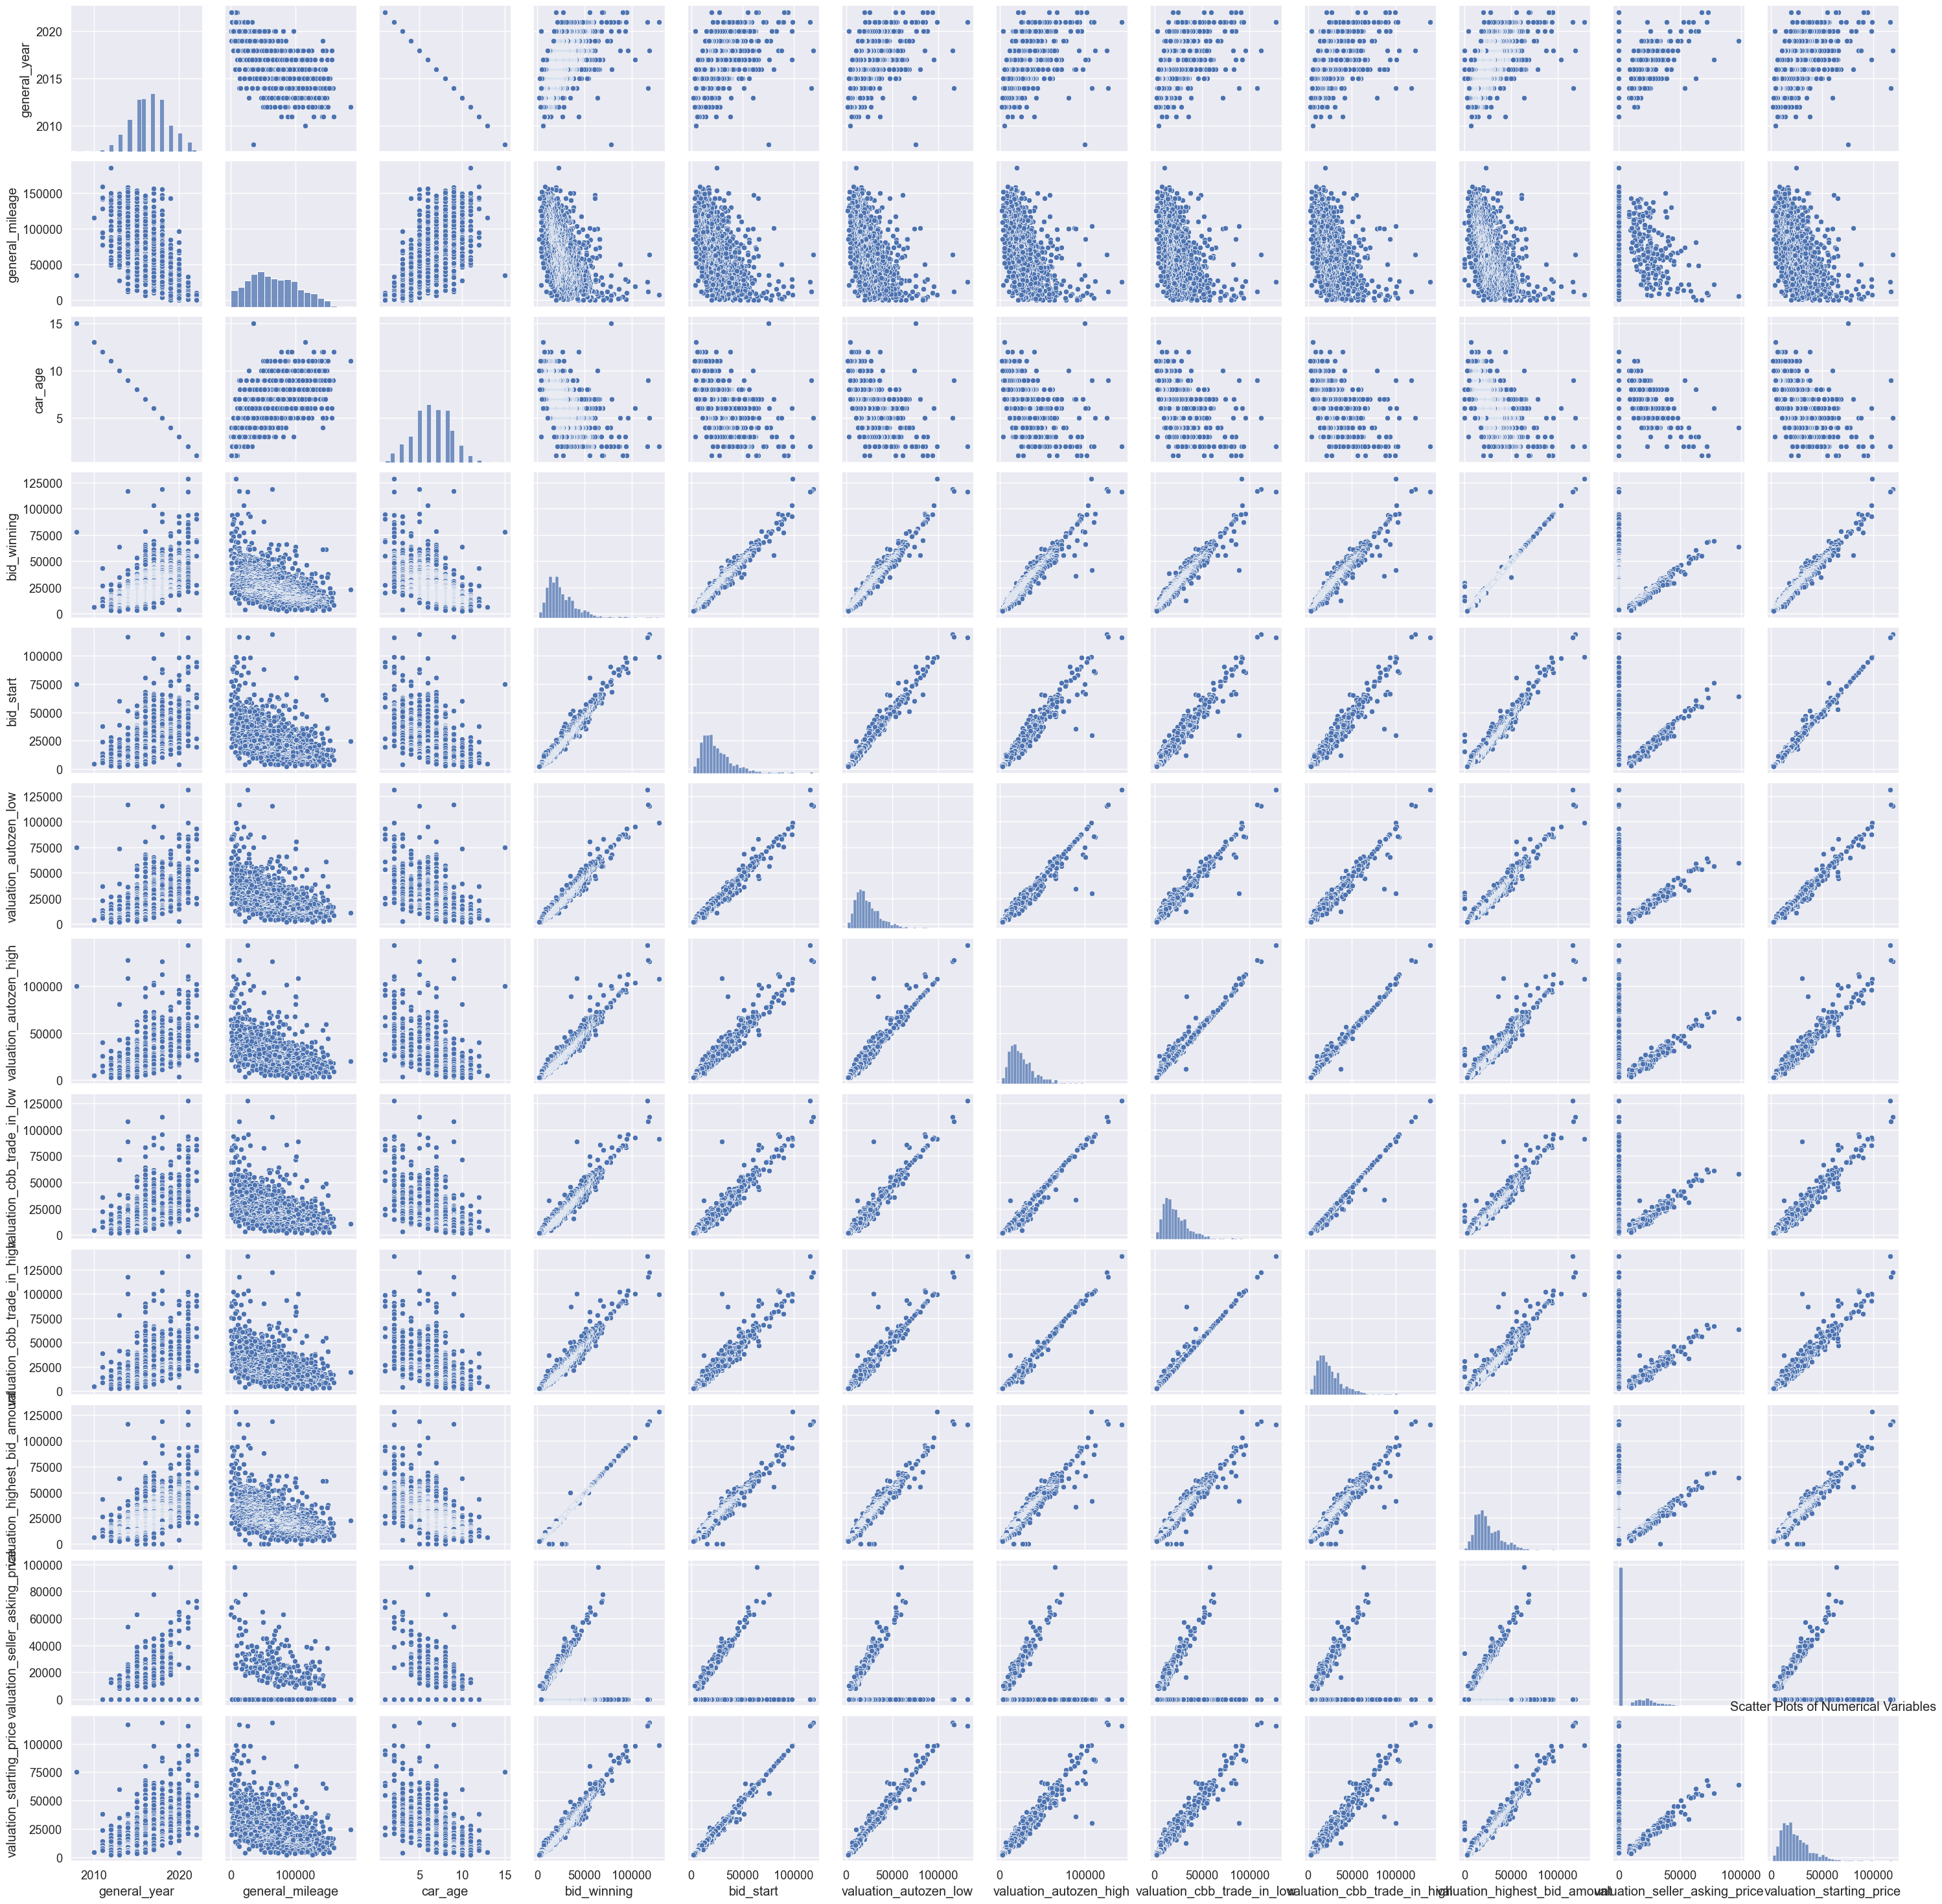

In [8]:
sns.set(font_scale=1.2)
sns.pairplot(data=num_df, kind='scatter')
plt.title('Scatter Plots of Numerical Variables')
plt.grid(False)
plt.show()

In [9]:
fig = go.Figure()
for col in num_df.columns:
    fig.add_trace(go.Box(x=num_df[col], name=col, orientation='h', boxpoints=False))

fig.update_layout(
    title='Boxplots of Numerical Variables',
    yaxis_title='Variables',
    xaxis_title='Values'
)
fig.show()


## Visualizing Binary Variables

Visualizing the distribution percentages of binary variables is valuable in exploratory data analysis (EDA) as it provides insights into the prevalence and balance of different categories within each variable. By displaying the percentages on a stacked bar chart, we can quickly observe the relative frequency of "Yes" and "No" responses. This visualization helps us understand the distribution patterns and identify any imbalances or biases in the dataset. It allows us to assess the proportion of positive and negative instances, which can be crucial in scenarios where class imbalance may affect model performance or decision-making. Additionally, visualizing the binary variables' distribution percentages aids in detecting any potential data quality issues, such as missing or erroneous values, and guides further data preprocessing and feature engineering steps.

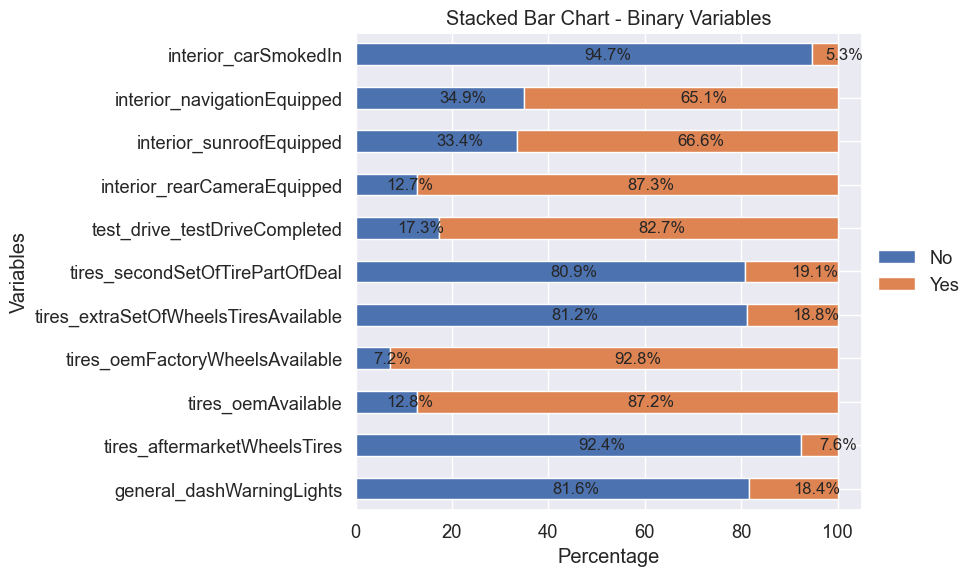

In [10]:
df_binary = df_won[AutozenFeatures.binary_feat_list]
binary_counts = df_binary.apply(lambda x: x.value_counts(normalize=True) * 100)
binary_counts = binary_counts.transpose()
ax = binary_counts.plot(kind='barh', stacked=True, figsize=(10, 6))

# Display percentage values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='left', va='center', fontsize=12)

plt.title('Stacked Bar Chart - Binary Variables')
plt.xlabel('Percentage')
plt.ylabel('Variables')

# Move the legend outside the plot
plt.legend(['No', 'Yes'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust plot layout
plt.show()


## Visualizing Categorical Variables

Visualizing categorical variables is essential during the exploratory data analysis (EDA) process and plays a crucial role in understanding the data and building an effective machine learning model. Categorical variable visualization helps us gain insights into the distribution, frequencies, and relationships between different categories, which can provide valuable information for feature engineering, model selection, and interpretation.

By visualizing categorical variables, we can identify the dominant categories and their proportions within each variable. This helps us understand the class imbalance, if any, and determine the representativeness of each category. Additionally, categorical variable visualizations allow us to observe patterns, trends, and associations between the categories, which can guide feature engineering decisions. For example, if certain categories have a higher winning bid on average, it might indicate their importance in predicting the winning bid. Visualizations also help us identify rare categories or outliers that may require special treatment during data preprocessing.

In the context of our final machine learning model with XGBoost to predict the winning bid for auctioned cars, analyzing and visualizing categorical variables can provide valuable insights. It helps us understand the impact of different categories on the target variable (winning bid) and uncover any relationships or dependencies. For instance, visualizing the "vehicle_lead_source" variable could reveal whether certain lead sources tend to result in higher or lower winning bids. This information can guide feature selection, model training, and tuning processes. By visualizing categorical variables, we can effectively explore the relationships between these variables and the target, aiding in the development of a robust and accurate predictive model.

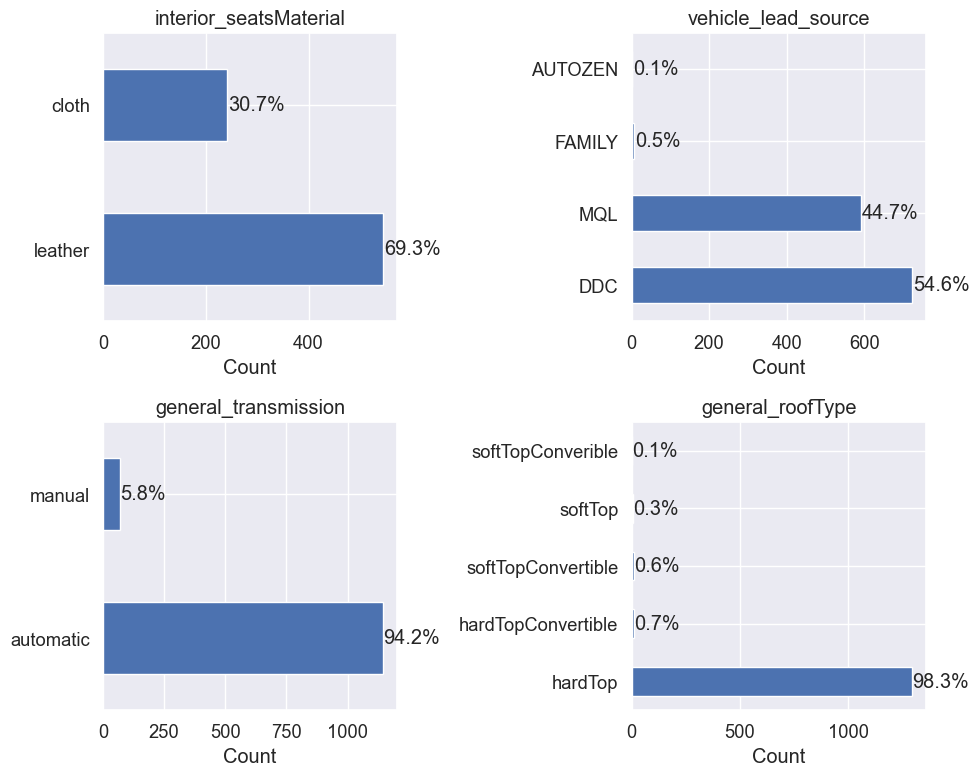

In [11]:
categorical_variables = ['interior_seatsMaterial', 'vehicle_lead_source', 'general_transmission', 'general_roofType']
plots_per_row = 2
num_rows = int(np.ceil(len(categorical_variables) / plots_per_row))
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(10, num_rows * 4))

for i, variable in enumerate(categorical_variables):
    category_counts = df_won[variable].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100
    if num_rows > 1:
        ax = axes[i // plots_per_row, i % plots_per_row]
    else:
        ax = axes[i % plots_per_row]
    category_counts.plot(kind='barh', ax=ax)
    
    ax.set_ylabel(None)
    ax.set_xlabel('Count')
    ax.set_title(variable)
    
    for j, count in enumerate(category_counts):
        percentage = category_percentages[j]
        ax.text(count + 2, j, f'{percentage:.1f}%', va='center')
        
plt.tight_layout()
plt.show()


## Visualizing Ordinal Variables

Visualizing ordinal variables is crucial in the exploratory data analysis (EDA) process as it allows us to gain insights into their distribution and understand their impact on the target variable. Ordinal variables have a specific order or ranking associated with their categories, making their visualization particularly informative. By examining the distribution of ordinal variables, we can assess the frequency and proportion of each category, identify any imbalances, and observe the patterns or trends present.

Understanding the distribution of ordinal variables helps us uncover potential relationships or associations between them and the target variable. By visualizing the stacked horizontal bar chart, we can observe the distribution of each ordinal variable's levels in a comprehensive and intuitive manner. This visualization enables us to identify dominant categories, spot outliers or unusual patterns, and gain a deeper understanding of the overall distribution of ordinal variables. Furthermore, examining the distribution can assist us in making informed decisions during feature engineering, such as identifying ordinal variables that may require encoding or transformation to enhance their predictive power.

In [12]:
ordinal_variables = df_won[AutozenFeatures.ordinal_feat_list]
ordinal_variables = ordinal_variables.drop("test_drive_alignment", axis=1)
ordinal_counts = ordinal_variables.apply(pd.Series.value_counts)
ordinal_counts = ordinal_counts.transpose()

column_order = ['nan', 'notAvailable', 'no',
                'serviceRequired', 'serviceSuggested', 'ok', 'yes']

# Reorder the columns
ordinal_counts = ordinal_counts.reindex(columns=column_order)

# Calculate the percentage of each level in the ordinal variable
ordinal_percentages = ordinal_counts.div(
    ordinal_counts.sum(axis=1), axis=0) * 100

# Define the custom colors for each level in the ordinal variable
colors = ['darkgray', 'darkgray', 'darkgray', 'red', 'orange', 'green', 'green']

fig = go.Figure()
for i, column in enumerate(ordinal_percentages.columns):
    # Add a horizontal bar trace for each level in the ordinal variable with custom color
    fig.add_trace(go.Bar(
        y=ordinal_percentages.index,
        x=ordinal_percentages[column],
        name=column,
        orientation='h',
        marker=dict(color=colors[i % len(colors)]),
        hovertemplate=[f"{column}<br>Feature: {level}<br>Count: {count:.0f}<br>Percentage: {percentage:.1f}%" 
              for level, count, percentage in zip(ordinal_counts[column].index, ordinal_counts[column], ordinal_percentages[column])]
    ))

fig.update_layout(
    barmode='stack',
    title='Stacked Horizontal Bar Chart - Ordinal Variables (Percentage)',
    xaxis_title='Percentage',
    yaxis_title='Ordinal Variables',
    height=2000
)
fig.show()

## Basic Statistics on the Autozen Data

In this section, we delve into the basic statistics of the Autozen dataset to gain an overview of the data. We explore various aspects, such as the most common car in the dataset, the distribution of cars by make, the most popular trim levels, the distribution of fuel types, cars with generally high mileage, cars with a generally high winning bid, and the time of the year with the highest bid.

- Determining the most popular trim levels provides valuable information on the preferred features or specifications that buyers seek in their vehicles. Understanding the distribution of fuel types helps us gauge the prevalence of different fuel sources, such as gasoline, diesel, hybrid, or electric, which can be indicative of environmental concerns or evolving technology.

- Investigating cars with generally high mileage helps identify potential outliers or instances of heavy usage. Similarly, examining cars with a generally high winning bid sheds light on valuable or sought-after vehicles. These analyses can uncover patterns or factors that contribute to higher prices or indicate specific market segments.

- Examining the time of the year with the highest bid allows us to identify potential seasonal variations in demand or bidding behavior, providing insights into the market dynamics and potential influencing factors.


### Most common car make that occurs in the data?
By analyzing the most common car in the data, we can identify the dominant car model or brand within the dataset, providing insights into consumer preferences or market trends. Additionally, examining the number of cars by make allows us to understand the distribution and representation of different car manufacturers in the dataset. From the bar graph below, we observe that we have Toyota as the most common car in the dataset forming 9.3% of the total and 14.1% of the top 10 Car Makes.

In [13]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

car_make_counts = df_won['general_make'].value_counts().sort_values(ascending=True)
car_make_counts_df = car_make_counts.reset_index()
car_make_counts_df.columns = ['Car Make', 'Number of Cars']
total_cars = car_make_counts.sum()
car_make_counts_df['Percentage'] = car_make_counts_df['Number of Cars'] / total_cars * 100

# Get the top 10 car makes
top_10_car_makes = car_make_counts_df['Car Make'][-10:]

# Calculate the sum of the remaining car makes
other_cars_count = car_make_counts_df.loc[~car_make_counts_df['Car Make'].isin(top_10_car_makes), 'Number of Cars'].sum()

# Create a new dataframe for the modified pie chart data
pie_chart_data = pd.DataFrame({
    'Car Make': top_10_car_makes.tolist() + ['Other'],
    'Number of Cars': car_make_counts_df.loc[car_make_counts_df['Car Make'].isin(top_10_car_makes), 'Number of Cars'].tolist() + [other_cars_count]
})

# Specify colors for the pie chart and bar plot
colors = ['rgb(166,206,227)', 'rgb(31,120,180)', 'rgb(178,223,138)', 'rgb(51,160,44)',
          'rgb(253,191,111)', 'rgb(255,127,0)', 'rgb(202,178,214)', 'rgb(106,61,154)',
          'rgb(227,26,28)', 'rgb(251,154,153)', 'rgb(217,217,217)']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of Cars Sold by Make', 'Top 10 Car Makes'),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
    x=car_make_counts_df['Number of Cars'],
    y=car_make_counts_df['Car Make'],
    orientation='h',
    text=car_make_counts_df['Number of Cars'],
    textposition='outside'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=pie_chart_data['Car Make'],
    values=pie_chart_data['Number of Cars'],
    textinfo='label+percent',
    marker=dict(colors=colors)
), row=1, col=2)

fig.update_layout(
    margin=dict(t=20, b=0, l=0, r=0),
    showlegend=False,
    xaxis=dict(range=[0, 150]),
    height=600
)

fig.show()

### Highest Car Models in the Top 3 Car Make Brands?

Exploring the distribution and percentage of car models for the top three car make brands. The data is obtained by filtering the dataset to include only the top three car make brands based on their frequency. The code then calculates the percentage of each car model within each car make brand. The resulting data is sorted by car make and percentage in descending order.

The findings show the highest car models in the top three car make brands. For the Ford brand, the Mustang and F150 are the most prominent models, accounting for 23.58% and 22.64% respectively. In the Honda brand, the Civic is the dominant model, representing 49.14% of the total. For the Toyota brand, the Corolla is the leading model, comprising 24.39% of the total. The bar graphs and pie charts visualize the distribution and percentages of the top car models for each car make brand, providing a clear comparison of the model preferences within the top three brands.

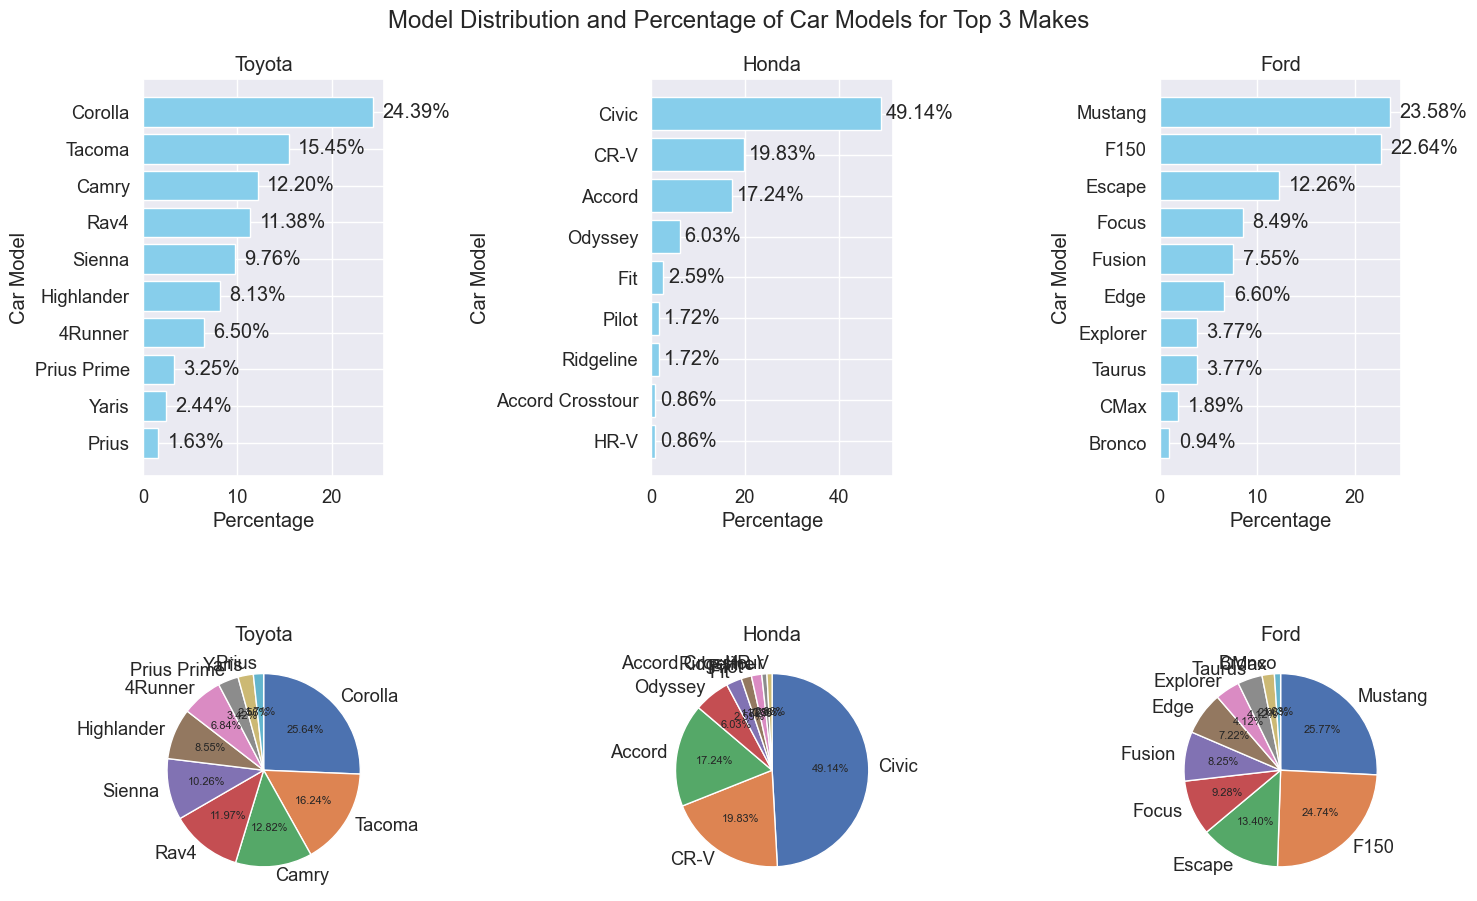

In [14]:
top_3_makes = df_won['general_make'].value_counts().nlargest(3).index.tolist()
df_top_3_makes = df_won[df_won['general_make'].isin(top_3_makes)]
model_percentages = (df_top_3_makes.groupby(['general_make', 'general_model'])
                     .size() / df_top_3_makes.groupby('general_make').size() * 100)
model_percentages = model_percentages.reset_index()
model_percentages.columns = ['Car Make', 'Car Model', 'Percentage']
model_percentages.sort_values(by=['Car Make', 'Percentage'], ascending=[
                              True, False], inplace=True)

num_makes = len(top_3_makes)
fig, axes = plt.subplots(2, num_makes, figsize=(15, 10))
fig.suptitle('Model Distribution and Percentage of Car Models for Top 3 Makes')

for i, make in enumerate(top_3_makes):
    make_data = model_percentages[model_percentages['Car Make'] == make]
    percentages = make_data['Percentage'].head(10)
    models = make_data['Car Model'].head(10)

    ax1 = axes[0, i]
    ax1.barh(models[::-1], percentages[::-1], color='skyblue')
    ax1.set_xlabel('Percentage')
    ax1.set_ylabel('Car Model')
    ax1.set_title(make)

    for j, (percentage, model) in enumerate(zip(percentages[::-1], models[::-1])):
        ax1.text(percentage + 1, j,
                 f'{percentage:.2f}%', ha='left', va='center')
    ax2 = axes[1, i]
    pie_wedges, _, text_labels = ax2.pie(
        percentages, labels=models, autopct='%.2f%%', startangle=90, counterclock=False)
    for label in text_labels:
        label.set_fontsize(8)
    ax2.set_title(make)

plt.tight_layout()
plt.show()


In [15]:
num_makes = len(top_3_makes)
fig = sp.make_subplots(rows=2, cols=num_makes, subplot_titles=top_3_makes, specs=[[{'type': 'bar'}]*num_makes, [{'type': 'pie'}]*num_makes])

for i, make in enumerate(top_3_makes):
    make_data = model_percentages[model_percentages['Car Make'] == make]
    percentages = make_data['Percentage'].head(10) 
    models = make_data['Car Model'].head(10)  

    fig.add_trace(
        go.Bar(x=percentages[::-1], y=models[::-1], orientation='h', marker_color='skyblue', showlegend=False),
        row=1, col=i+1)
    
    fig.add_trace(
        go.Pie(labels=models, values=percentages, textinfo='label+percent', hole=0.4),
        row=2, col=i+1)

fig.update_layout(
    title='Model Distribution and Percentage of Car Models for Top 3 Makes',
    height=600,
    width=1200,
    showlegend=False
)
fig.show()


### Average Auction Price by Car Make

In [16]:
make_df = df_won[['general_make', 'bid_winning']]

fig = go.Figure()

# Reverse the order of car makes
for make in reversed(make_df['general_make'].unique()):
    make_data = make_df[make_df['general_make'] == make]
    fig.add_trace(go.Box(x=make_data['bid_winning'], name=make, boxpoints=False,
                  marker_color='blue', orientation='h', showlegend=False))

fig.update_layout(
    title='Distribution of Auction Price by Car Make',
    yaxis_title='Car Make',
    xaxis_title='Auction Price ($CAD)',
    height=900
)

fig.show()


### Fuel Type Dsitribution


The fuel types analyzed are electric, diesel, hybrid, and gasoline, with a grand total of 1,143 vehicles as seen on the cross tab below. The findings from the analysis indicate that electric vehicles have the highest average bid winning price at $50,007, followed by diesel vehicles at $31,124, hybrid vehicles at $26,702, and gasoline vehicles at $24,559. Similarly, the average values for CBB high and AZ high are highest for electric vehicles, while CBB low and AZ low values are highest for diesel vehicles.

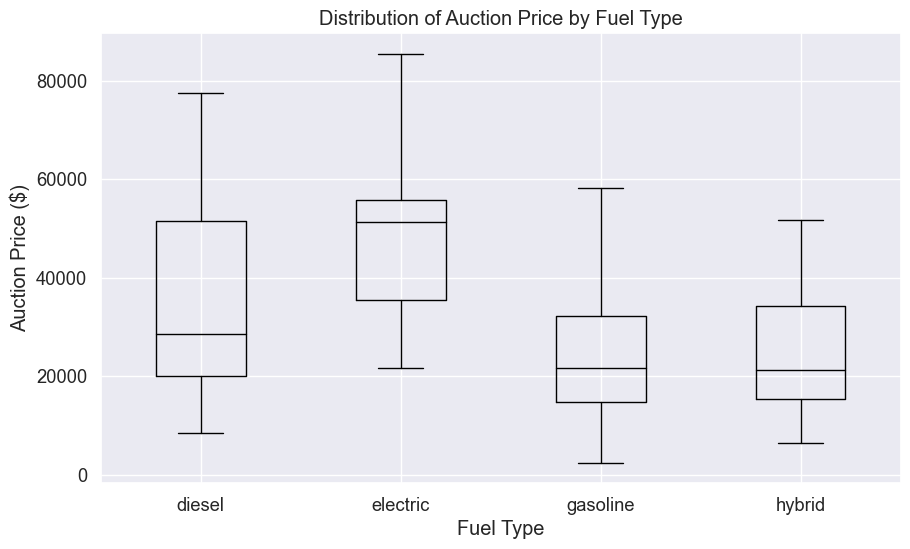

In [17]:
fuel_df = df_won[['general_fuelType', 'bid_start', 'bid_winning', 
                  'valuation_autozen_low', 'valuation_autozen_high', 
                  'valuation_cbb_trade_in_low', 'valuation_cbb_trade_in_high'
                  ]]

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
fuel_df.boxplot(column='bid_winning', by='general_fuelType', ax=ax, showfliers=False, color='black')

# Set labels and title
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Auction Price ($)')
ax.set_title('Distribution of Auction Price by Fuel Type')


# Show the plot
plt.suptitle('')  # Remove the overall title generated by pandas
plt.show()


In [18]:
fuel_summary = fuel_df.groupby('general_fuelType').agg('mean').round(0)
fuel_summary

bid_start  bid_winning  valuation_autozen_low  \
general_fuelType                                                  
diesel              34309.0      34850.0                32092.0   
electric            49229.0      50007.0                48192.0   
gasoline            24064.0      24918.0                23496.0   
hybrid              25022.0      26402.0                24512.0   

                  valuation_autozen_high  valuation_cbb_trade_in_low  \
general_fuelType                                                       
diesel                           37152.0                     31108.0   
electric                         55936.0                     48866.0   
gasoline                         26102.0                     22101.0   
hybrid                           28034.0                     23955.0   

                  valuation_cbb_trade_in_high  
general_fuelType                               
diesel                                36103.0  
electric                              53357.0  
gasoline                              24548.0  
hybrid                                26498.0

![FuelComp](./img/fuelcomp.png)

### Cars with Highest Mileage and Highest Winning Bid

Here we analyze the average bid winning prices and general mileage for various car makes. The table presents the top car makes along with their corresponding average bid winning prices and average general mileage.

Summary of Findings:

- The car make with the highest average bid winning price is Porsche, with an average of $66,295.78 CAD.
- The car make with the highest average general mileage is Lincoln, with an average of 105,135 miles.
- Some car makes, such as Smart and Maserati, have relatively low average bid winning prices but also low general mileage.
- On the other hand, car makes like Tesla and Porsche have higher average bid winning prices but lower general mileage compared to other models.
- Overall, there is a varied range of average bid winning prices and general mileage across different car makes, indicating a diverse market for both high-end and more affordable vehicles.

In [19]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

df_winning_bids = df_won.groupby('general_make').agg({
    'bid_winning': 'mean',
    'general_mileage': 'mean'
}).reset_index()

df_winning_bids = df_winning_bids.sort_values('bid_winning', ascending=False)

plt.figure(figsize=(8, 7))
plt.scatter(df_winning_bids['bid_winning'], df_winning_bids['general_mileage'])
plt.xlabel('Bid Winning ($)')
plt.ylabel('Mileage (km)')
plt.title('Average Auction Price and Mileage by Car Make')

# Add annotations for each car make
labels = []
for i, row in df_winning_bids.iterrows():
    make = row['general_make']
    x = row['bid_winning']
    y = row['general_mileage']
    label = plt.annotate(make, (x, y), textcoords="offset points", xytext=(5, 5), ha='left', va='bottom', fontsize=10)
    labels.append(label)

# Adjust the positions of the labels to avoid overlap
adjust_text(labels)

IMAGE_to_save = os.path.join(img_dir,"FigS3_AvgAuctionPrice_and_Mileage_by_Make.png")
plt.savefig(IMAGE_to_save, dpi=300)

plt.show()

ModuleNotFoundError: No module named 'adjustText'

### Time of the Year with the Highest Bids

Here, we investigate the time of the year when the average winning bids are the highest. This investigation is crucial in understanding the seasonal patterns and trends in the bidding activity. By examining the data, we can identify the months that tend to yield higher average winning bids, providing valuable insights for auction strategy and decision-making.

The results show that the average winning bids vary across different months of the year. The summary of the findings is as follows:

- January: $30,302.90
- February: $25,736.19
- March: $27,558.30
- April: $24,351.63
- May: $18,967.85
- June: $19,494.50
- July: $20,830.14
- August: $24,317.99
- September: $23,918.59
- October: $24,816.96
- November: $26,867.38
- December: $30,512.68

The analysis reveals that the months of January and December have the highest average winning bids, indicating a potential seasonality effect during the winter months. On the other hand, May and June have relatively lower average winning bids. These insights can assist in strategic planning and decision-making when participating in auctions during specific times of the year.

In [ ]:
import calendar
import matplotlib.pyplot as plt

# Calculate the average highest bid amount and the total number of cars sold per month
df_monthly_avg_bids = df_won.groupby('month_of_year')['valuation_highest_bid_amount'].mean().reset_index()
df_monthly_total_sales = df_won.groupby('month_of_year').size().reset_index(name='total_cars_sold')

# Sort the dataframes by month_of_year
df_monthly_avg_bids = df_monthly_avg_bids.sort_values('month_of_year')
df_monthly_total_sales = df_monthly_total_sales.sort_values('month_of_year')

# Create the first y-axis for average highest bid amount
fig, ax1 = plt.subplots()

# Plot the average highest bid amount
ax1.plot(df_monthly_avg_bids['month_of_year'], df_monthly_avg_bids['valuation_highest_bid_amount'], color='midnightblue', label='Average Price')
ax1.set_ylabel('Average Price ($CAD)')
ax1.tick_params(axis='y')

# Create the second y-axis for total number of cars sold
ax2 = ax1.twinx()

# Plot the total number of cars sold
ax2.plot(df_monthly_total_sales['month_of_year'], df_monthly_total_sales['total_cars_sold'], color='red', label='Count')
ax2.set_ylabel('Count of cars sold')
ax2.tick_params(axis='y')

# Set x-axis ticks and labels
months = [calendar.month_abbr[m] for m in df_monthly_avg_bids['month_of_year']]
plt.xticks(df_monthly_avg_bids['month_of_year'], months)

# Set plot title
plt.title('Seasonality in Cars Sold')

# Add legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
plt.legend(lines, [line.get_label() for line in lines])

# Ensure both y-axes start at 0
ax1.set_ylim(0, 40000)
ax2.set_ylim(0, 250)

# Set custom colors
ax1.yaxis.label.set_color('midnightblue')
ax2.yaxis.label.set_color('red')

# Adjust left margin to make room for the axis label
plt.subplots_adjust(left=0.15)

IMAGE_to_save = os.path.join(img_dir, "FigS4_AvgAuctionPrice_by_season.png")
plt.savefig(IMAGE_to_save, dpi=300)

# Display the plot
plt.show()

By examining these basic statistics, we gain a comprehensive understanding of the Autozen dataset, enabling us to make informed decisions, generate hypotheses for further exploration, or identify potential areas of interest for subsequent analysis.

## Price distribution of sold used cars

### Distribution of difference in price between Autozen valuation and winning bids

The provided code calculates the difference in price between the winning bids and the starting prices for vehicles in the filtered and merged auctions dataset. It then creates a histogram to visualize the distribution of these price differences. We need to look at this code to understand the distribution of the price differences between the auctioned prices and the predicted prices by Autozen. This analysis helps us assess the accuracy and effectiveness of the Autozen valuation in predicting the final auction prices. The histogram provides insights into the range and frequency of the price differences, allowing us to evaluate any potential biases or discrepancies in the valuation process.

In [ ]:
values_df = df_won[['valuation_starting_price', 'bid_winning']].dropna(axis=0)
values_df['difference'] = values_df['bid_winning'] - values_df['valuation_starting_price']
# Plot a histogram of the bid_winning column
values_df['difference'].hist(bins=40, range=(-10000, 10000), )

# Add axis labels and a title
plt.xlabel('CAD dollars')
plt.ylabel('Number of cars')
plt.title('Distribution of Price Differences (Predicted vs Actual)')

# Remove the grid
# plt.grid(False)

# Save the plot as a PNG file
IMAGE_to_save = os.path.join(img_dir,"Fig2_Distribution_of_Price_Differences.png")
plt.savefig(IMAGE_to_save)

# Show the plot
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = values_df['difference'].describe()

# Count differences larger than 2000 in both directions
num_diff_greater_than_2000 = np.sum(np.abs(values_df['difference']) > 2000)

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)

# Print the count of differences larger than 2000
print("Number of Differences Larger than 2000:")
print(num_diff_greater_than_2000)

### CBB and Autozen valuations relative to Auction Price
This code performs evaluation and comparison between predictions made by Autozen and CBB (Car Book Value) models for vehicle valuation. It calculates various evaluation metrics such as R-squared (R2), Mean Absolute Percentage Error (MAPE), Negative Mean Squared Error (MSE), and Negative Root Mean Squared Error (RMSE). The results are stored in a DataFrame called "Autozen_CBB_evaluation_all_time" for further analysis and comparison.

In [ ]:
# Autozen features are defined in AutozenFeatures in the scripts modules
data_dir = os.path.join(notebook_dir, ".", "data")
MERGED_PROCESSED_pred = os.path.join(data_dir,"predicted_results.csv")
pred_df = pd.read_csv(MERGED_PROCESSED_pred, index_col=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
pred_df = pred_df[
    [
        "valuation_cbb_trade_in_low",
        "valuation_cbb_trade_in_high",
        "valuation_autozen_low",
        "valuation_autozen_high",
        "Predicted_75_lower_bound",
        "Predicted_75_upper_bound",
        "Predicted_price",
        "created_at"
    ]
]
pred_df['bid_winning'] = df_won['bid_winning']

# Convert "created_at" to datetime
pred_df["created_at"] = pd.to_datetime(pred_df["created_at"])

# Group by quarter year
pred_df["quarter_year"] = pred_df["created_at"].dt.to_period("Q")


# Replace null and NaN values in valuation_cbb_trade_in_low with values from valuation_cbb_trade_in_high, and vice versa
pred_df["valuation_cbb_trade_in_low"] = pred_df["valuation_cbb_trade_in_low"].fillna(
    pred_df["valuation_cbb_trade_in_high"]
)
pred_df["valuation_cbb_trade_in_high"] = pred_df["valuation_cbb_trade_in_high"].fillna(
    pred_df["valuation_cbb_trade_in_low"]
)

# Calculate the mean value for each pair of valuation_cbb_trade_in_low and valuation_cbb_trade_in_high
pred_df["valuation_cbb_trade_in_mean"] = np.average(
    pred_df[["valuation_cbb_trade_in_low", "valuation_cbb_trade_in_high"]], axis=1
)

# Calculate the mean value for each pair of valuation_autozen_low and valuation_autozen_high
pred_df["valuation_autozen_mean"] = np.average(
    pred_df[["valuation_autozen_low", "valuation_autozen_high"]], axis=1
)

cbb_nonnull_pred_df = pred_df[
    pred_df[["valuation_cbb_trade_in_mean", "bid_winning"]].notnull().all(axis=1)
]

cbb_preds = cbb_nonnull_pred_df["valuation_cbb_trade_in_mean"]
az_preds = pred_df["valuation_autozen_mean"]
capstone_preds = pred_df['Predicted_price']
y_cbb = cbb_nonnull_pred_df["bid_winning"]
y_az = pred_df["bid_winning"]
y_capstone = pred_df["bid_winning"]

def evaluation(y, preds, quarter, pre_name):
    scoring = {}
    scoring["Prediction"] = pre_name
    scoring['Quarter'] = quarter
    scoring['Data Count'] = len(y)
    scoring["R2"] = r2_score(y, preds)
    scoring["MAPE"] = mean_absolute_percentage_error(y, preds) * 100
    scoring["Negative MSE"] = -mean_squared_error(y, preds)
    scoring["Negative RMSE"] = -np.sqrt(mean_squared_error(y, preds))
    return scoring


scoring_list = []
scoring_list.append(evaluation(y_cbb, cbb_preds, "All-time", "CBB"))
scoring_list.append(evaluation(y_az, az_preds,"All-time", "Autozen"))
scoring_list.append(evaluation(y_capstone, capstone_preds,"All-time", "Capstone"))
scoring_list.append(evaluation(y_capstone[1058:], capstone_preds[1058:],"All-time", "Capstone Validation"))

Autozen_CBB_evaluation_all_time = pd.DataFrame(scoring_list)
Autozen_CBB_evaluation_all_time

## How that difference varied over the lifetime of the dataset ?

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


def calculate_evaluation(y, preds, quarter, pre_name):
    scoring = {}
    scoring["Prediction"] = pre_name
    scoring['Quarter'] = quarter
    scoring["MAPE"] = mean_absolute_percentage_error(y, preds) * 100
    scoring["Data Count"] = len(y)
    return scoring


def plot_evaluation(Autozen_CBB_evaluation):
    colors = {
        'CBB': 'C0',
        'Autozen': 'C1',
        'Capstone': 'C2',
        # 'Capstone Validation': 'C3',
    }

    fig, ax = plt.subplots(figsize=(10, 6))
    for prediction, group in Autozen_CBB_evaluation.groupby("Prediction"):
        ax.plot(group["Quarter"].astype(str), group["MAPE"],
                marker='o', color=colors[prediction], label=prediction)

    # Calculate the average MAPE
    average_mape = Autozen_CBB_evaluation["MAPE"].mean()

    ax.axhline(Autozen_CBB_evaluation_all_time['MAPE'][1],
               color='C1', linestyle='--', label='Autozen Average')
    ax.axhline(Autozen_CBB_evaluation_all_time['MAPE'][0],
               color='C0', linestyle='--', label='CBB Average')
    ax.axhline(Autozen_CBB_evaluation_all_time['MAPE']
               [2], color='C2', linestyle='--', label='Capstone')
    # ax.axhline(Autozen_CBB_evaluation_all_time['MAPE'][3], color='C3', linestyle='--', label='Capstone Validation')
    ax.set_xlabel("Quarter", fontsize=18)
    ax.set_ylabel("MAPE", fontsize=18)
    ax.set_title("Average Quarterly MAPE", fontsize=18)

    fmt = '%.0f%%'
    yticks = mtick.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)
    ax.tick_params(axis='both', labelsize=14)

    # Add legend with increased font size
    plt.legend(fontsize=15)
    plt.xticks(rotation=45)
    ax.grid(False)  # Remove the grid
    plt.ylim(0, 27)

# Group by quarter year and apply the evaluation metric to each group
def evaluate_model(df, y_column, preds_column, model_name):
    scoring_list = []
    for quarter, group in df.groupby("quarter_year"):
        y_quarter = group[y_column]
        preds_quarter = group[preds_column]
        scoring_list.append(calculate_evaluation(
            y_quarter, preds_quarter, quarter, model_name))
    return pd.DataFrame(scoring_list)


pred_df_evaluation = evaluate_model(
    pred_df, "bid_winning", "valuation_autozen_mean", "Autozen")
cbb_nonnull_pred_df_evaluation = evaluate_model(
    cbb_nonnull_pred_df, "bid_winning", "valuation_cbb_trade_in_mean", "CBB")
capstone_df_evaluation = evaluate_model(
    pred_df, "bid_winning", "Predicted_price", "Capstone")
# capstone_valid_evaluation = evaluate_model(
#     pred_df[1058:], "bid_winning", "Predicted_price", "Capstone Validation")

Autozen_CBB_evaluation = pd.concat(
    [pred_df_evaluation, 
     cbb_nonnull_pred_df_evaluation, 
     capstone_df_evaluation, 
    #  capstone_valid_evaluation
     ])

plot_evaluation(Autozen_CBB_evaluation)

# Save the plot as a PNG file
IMAGE_to_save = os.path.join(img_dir,"Fig3_Average_Quarterly_MAPE.png")
plt.savefig(IMAGE_to_save, dpi=300)

plt.show()

Autozen_CBB_evaluation


In [ ]:
values_df = pred_df[['Predicted_price', 'bid_winning']].dropna(axis=0)
values_df['difference'] = values_df['bid_winning'] - values_df['Predicted_price']
# Plot a histogram of the bid_winning column
values_df['difference'].hist(bins=40, range=(-10000, 10000), )

# Add axis labels and a title
plt.xlabel('CAD dollars')
plt.ylabel('Number of cars')
plt.title('Distribution of Price Differences (Predicted vs Actual)')

# Remove the grid
# plt.grid(False)

# Save the plot as a PNG file
# IMAGE_to_save = os.path.join(img_dir,"Fig2_Distribution_of_Price_Differences.png")
# plt.savefig(IMAGE_to_save)

# Show the plot
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = values_df['difference'].describe()

# Count differences larger than 2000 in both directions
num_diff_greater_than_2000 = np.sum(np.abs(values_df['difference']) > 2000)

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)

# Print the count of differences larger than 2000
print("Number of Differences Larger than 2000:")
print(num_diff_greater_than_2000)

## Was the Auction Price ouside or inside the Autozen and CBB Range ?

In [ ]:
import pandas as pd

# Calculate coverage probabilities
coverage_probabilities = []
for index, row in pred_df.iterrows():
    cbb_coverage = (row['bid_winning'] >= row['valuation_cbb_trade_in_low']) and (row['bid_winning'] <= row['valuation_cbb_trade_in_high'])
    autozen_coverage = (row['bid_winning'] >= row['valuation_autozen_low']) and (row['bid_winning'] <= row['valuation_autozen_high'])
    predicted_coverage = (row['bid_winning'] >= row['Predicted_75_lower_bound']) and (row['bid_winning'] <= row['Predicted_75_upper_bound'])
    
    coverage_probabilities.append({
        'CBB Coverage': cbb_coverage,
        'Autozen Coverage': autozen_coverage,
        'Capstone Coverage': predicted_coverage
    })

# Calculate coverage probabilities as percentages
cbb_coverage_prob = sum(pair['CBB Coverage'] for pair in coverage_probabilities) / len(coverage_probabilities) * 100
autozen_coverage_prob = sum(pair['Autozen Coverage'] for pair in coverage_probabilities) / len(coverage_probabilities) * 100
predicted_coverage_prob = sum(pair['Capstone Coverage'] for pair in coverage_probabilities) / len(coverage_probabilities) * 100

# Create a DataFrame to store the coverage probabilities
coverage_table = pd.DataFrame({
    'Model': ['CBB', 'Autozen', 'Capstone'],
    'Coverage Probability': [cbb_coverage_prob, autozen_coverage_prob, predicted_coverage_prob]
})

# Display the coverage table
coverage_table

## How Autozen and CBB valuation delta relative to Auction Price changed over time ?

In [ ]:
# Calculate the delta (difference) between valuation_cbb_trade_in_high and valuation_cbb_trade_in_low
pred_df["cbb_delta"] = np.abs(pred_df["valuation_cbb_trade_in_high"] - pred_df["valuation_cbb_trade_in_low"])

# Calculate the delta (difference) between valuation_autozen_high and valuation_autozen_low
pred_df["autozen_delta"] = np.abs(pred_df["valuation_autozen_high"] - pred_df["valuation_autozen_low"])

# Calculate the delta (difference) between capstone model's Predicted_75_upper_bound and Predicted_75_lower_bound
pred_df["capstone_delta"] = np.abs(pred_df["Predicted_75_upper_bound"] - pred_df["Predicted_75_lower_bound"])

# Group by quarter year and calculate the average delta for each quarter
quarterly_cbb_delta = pred_df.groupby("quarter_year")["cbb_delta"].mean()
quarterly_autozen_delta = pred_df.groupby("quarter_year")["autozen_delta"].mean()
quarterly_capstone_delta = pred_df.groupby("quarter_year")["capstone_delta"].mean()

# Convert Period index to strings
quarter_labels = quarterly_cbb_delta.index.astype(str)

# Plot the changes in average delta over time
plt.figure(figsize=(10, 6))
plt.plot(quarter_labels, quarterly_autozen_delta.values, color='C1', marker='o', label='Autozen Delta')
plt.plot(quarter_labels, quarterly_cbb_delta.values, color='C0', marker='o', label='CBB Delta')
plt.plot(quarter_labels, quarterly_capstone_delta.values, color='C2', marker='o', label='Capstone Delta')
plt.axhline(pred_df["autozen_delta"].mean(), color='C1', linestyle='--', label='Autozen Average')
plt.axhline(pred_df["cbb_delta"].mean(), color='C0', linestyle='--', label='CBB Average')
plt.axhline(pred_df["capstone_delta"].mean(), color='C2', linestyle='--', label='Capstone Average')
plt.xlabel("Quarter Year")
plt.ylabel("Average Absolute Delta ($CAD)")
plt.title("Average Absolute Delta ($CAD) over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Tableau Dashboard

We also have compiled all these graphs in an interactive Tableau Dashboard for further insights:

![Dashboard](./img/DashboardSS.png)